# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 13 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [ ]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

norm_sample = norm_distr.rvs(size=N)
laplacian_sample = laplacian_distr.rvs(size=N)
cauchy_sample = cauchy_distr.rvs(size=N)

Постройте график плотности распределения для всех трех распределений на одних осях.

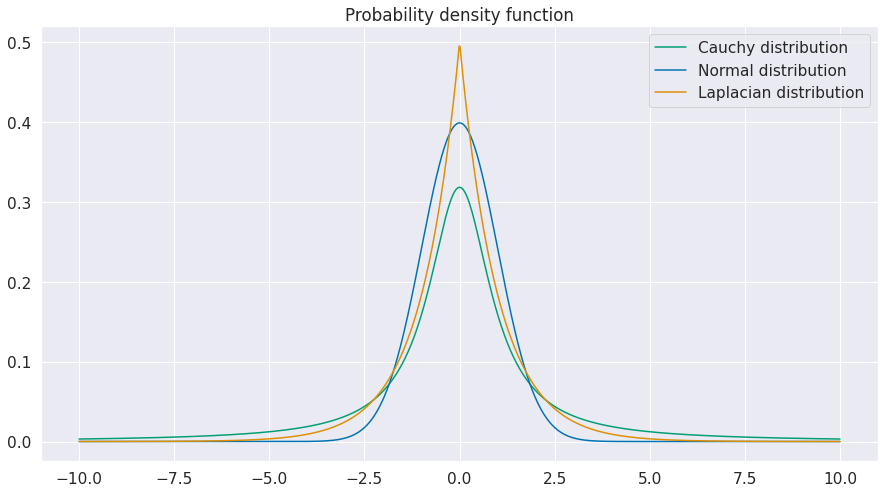

In [ ]:
plt.figure(figsize=(15, 8))
grid = linspace(-10, 10, 1000)
plt.title("Probability density function")
plt.plot(grid, cauchy_distr.pdf(grid), color=color_for_cauchy, label='Cauchy distribution')
plt.plot(grid, norm_distr.pdf(grid), color=color_for_normal,label='Normal distribution')
plt.plot(grid, laplacian_distr.pdf(grid), color=color_for_laplace,label='Laplacian distribution')
plt.legend()
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Для нормального проще всего, для распределения Коши сложнее всего. Самый большой разброс значений будет у Коши, так как "много вероятности" сосредоточено вдали от центра симметрии в ветвях. Значения выборки из нормального распределения, напротив, будут "плотнее" лежать к нулю.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [ ]:
import math

def truncated_mean(sample, alpha=0.3):
    size = np.size(sample)
    sorted_sample = np.sort(sample)
    return np.mean(sorted_sample[int(size*alpha):int(size*(1-alpha))])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [ ]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    func = lambda x: x**2 * distr.pdf(x)
    return 2*(quad(func, 0, distr.ppf(1-alpha))[0]+alpha*distr.ppf(1-alpha)**2)/(1-2*alpha)**2

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

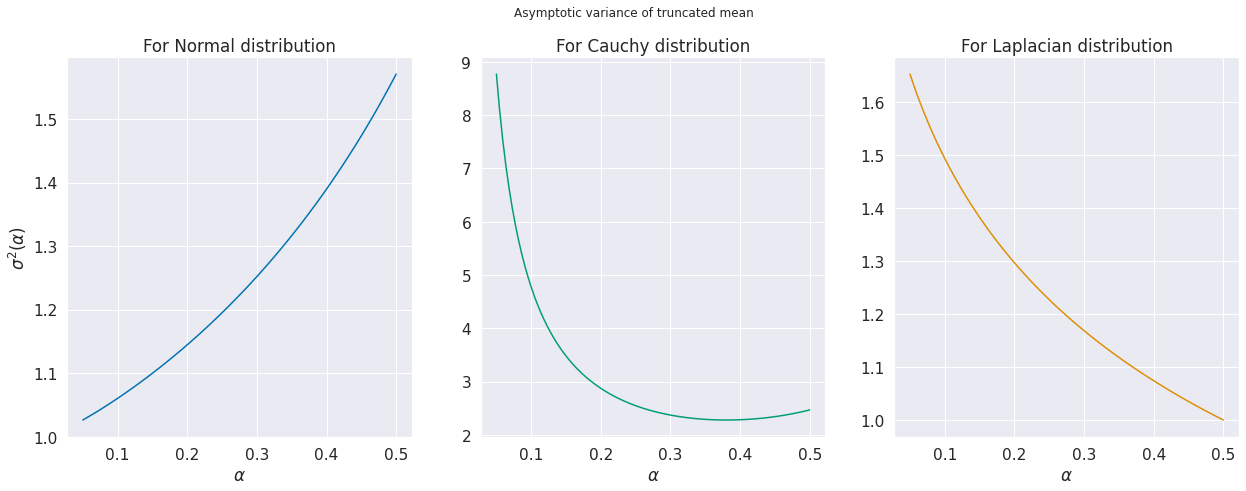

In [ ]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

fig, axes = plt.subplots(1, 3, figsize=(21,7))

fig.suptitle("Asymptotic variance of truncated mean")
axes[0].set_title("For Normal distribution")
axes[1].set_title("For Cauchy distribution")
axes[2].set_title("For Laplacian distribution")

axes[0].plot(alpha_grid, [asymp_var(norm_distr, a) for a in alpha_grid], color=color_for_normal)
axes[1].plot(alpha_grid, [asymp_var(cauchy_distr, a) for a in alpha_grid], color=color_for_cauchy)
axes[2].plot(alpha_grid, [asymp_var(laplacian_distr, a) for a in alpha_grid], color=color_for_laplace)
axes[0].set_xlabel(r"$\alpha$")
axes[1].set_xlabel(r"$\alpha$")
axes[2].set_xlabel(r"$\alpha$")
axes[0].set_ylabel(r"$\sigma^2(\alpha)$")
plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** Усеченное среднее порядка 0 - это среднее (арифметическое) или мат.ож. выборки, а порядка 0.5 - медиана. Графики говорят о том, что для выборки из нормального определения лучше использовать среднее, а вот для распредлений Лапласа и Коши - медиану. Причем в случае с распределением Коши разброс значений среднего будет существенно большим.

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [ ]:
alpha = 0.35

norm_mean = np.cumsum(norm_sample, axis=0) / (np.arange(N)+1)
cauchy_mean = np.cumsum(cauchy_sample, axis=0) / (np.arange(N)+1)
laplacian_mean = np.cumsum(laplacian_sample, axis=0) / (np.arange(N)+1)

norm_median = [np.median(norm_sample[:i]) for i in (np.arange(N)+1)]
cauchy_median = [np.median(cauchy_sample[:i]) for i in (np.arange(N)+1)]
laplacian_median = [np.median(laplacian_sample[:i]) for i in (np.arange(N)+1)]

norm_truncated_mean = [truncated_mean(norm_sample[:i], alpha) for i in (np.arange(N)+1)]
cauchy_truncated_mean = [truncated_mean(cauchy_sample[:i], alpha) for i in (np.arange(N)+1)]
laplacian_truncated_mean = [truncated_mean(laplacian_sample[:i], alpha) for i in (np.arange(N)+1)]

**Нормальное распределение**

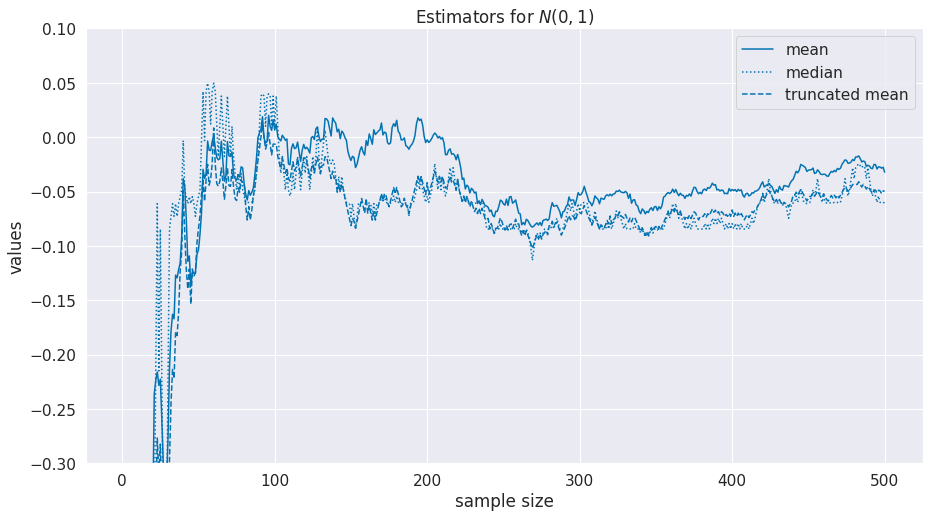

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Estimators for $N(0,1)$")
plt.plot((np.arange(N)+1), norm_mean, color=color_for_normal, label='mean')
plt.plot((np.arange(N)+1), norm_median, ":", color=color_for_normal,label='median')
plt.plot((np.arange(N)+1), norm_truncated_mean, "--", color=color_for_normal, label='truncated mean')
plt.ylim(-0.3, 0.1)
plt.xlabel("sample size")
plt.ylabel("values")
plt.legend()
plt.show()

**Распределение Лапласа**

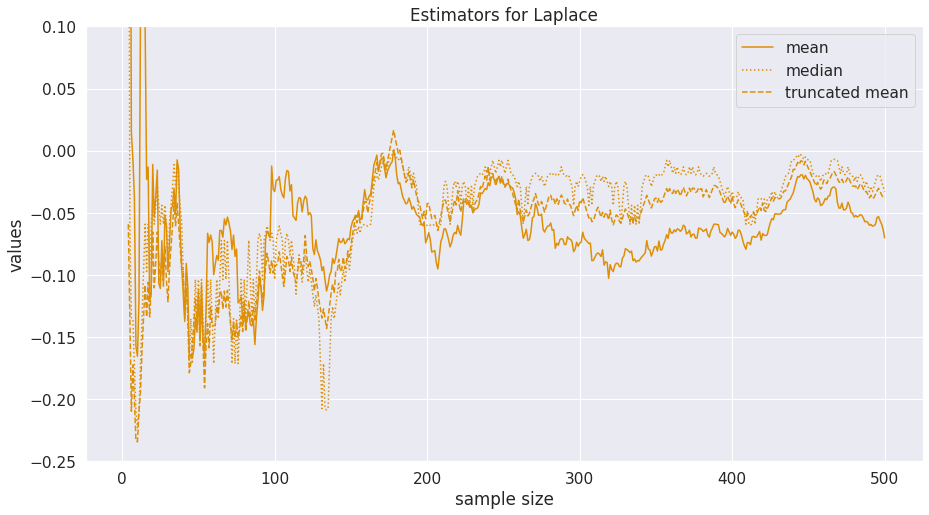

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Estimators for Laplace")
plt.plot((np.arange(N)+1), laplacian_mean, color=color_for_laplace, label='mean')
plt.plot((np.arange(N)+1), laplacian_median, ":", color=color_for_laplace,label='median')
plt.plot((np.arange(N)+1), laplacian_truncated_mean, "--", color=color_for_laplace, label='truncated mean')
plt.ylim(-0.25, 0.1)
plt.xlabel("sample size")
plt.ylabel("values")
plt.legend()
plt.show()

**Распределение Коши**

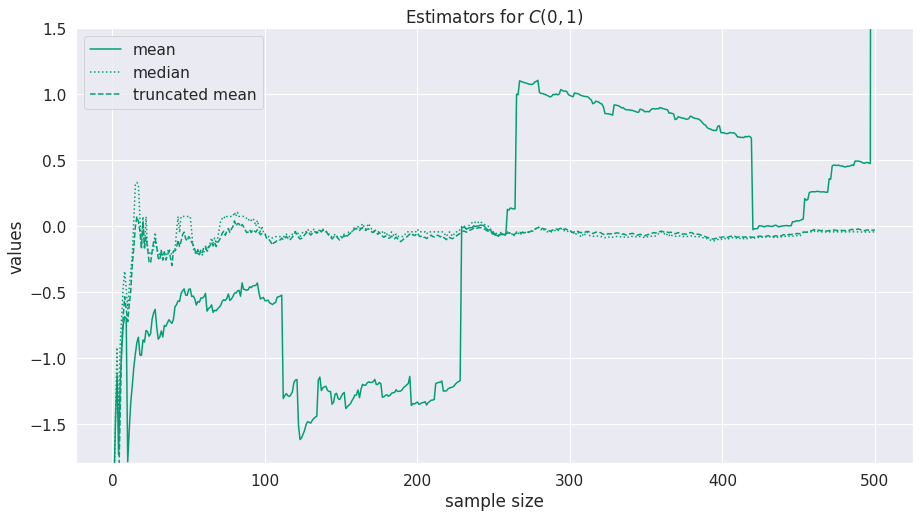

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Estimators for $C(0, 1)$")
plt.plot((np.arange(N)+1), cauchy_mean, color=color_for_cauchy, label='mean')
plt.plot((np.arange(N)+1), cauchy_median, ":", color=color_for_cauchy,label='median')
plt.plot((np.arange(N)+1), cauchy_truncated_mean, "--", color=color_for_cauchy, label='truncated mean')
plt.ylim(-1.8, 1.5)
plt.xlabel("sample size")
plt.ylabel("values")
plt.legend()
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** Для нормального распределения разброс значений среднего меньше, чем медианы. Для Коши и Лапласа наоборот. Еще можно заметить, что у распределения Коши разброс среднего значительно больше, чем у распределения Лапласа. И еще значения среднего у нормального распределения ближе к 0, а у распределений Коши и Лапласа к 0 ближе медианы.

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 28.6MB/s]


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("winequality-red.csv")

In [ ]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [ ]:
def get_category(x): 
  if x.alcohol <= 10:
    return "low alcohol"
  if x.alcohol <= 12:
    return "medium alcohol"
  return "high alcohol"

data['category'] = data.apply(get_category, axis=1)

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [ ]:
median = []
mean = []
for category in ["low alcohol", "medium alcohol", "high alcohol"]:
  median.append(data.where(data['category'] == category)["residual sugar"].median())
  mean.append(data.where(data['category'] == category)["residual sugar"].mean())

pd_sugar = pd.DataFrame({'category': ['low alcohol', 'medium alcohol', 'high alcohol'], 'mean': mean, 'median': median})
pd_sugar.set_index('category')

,mean,median
category,,
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2
high alcohol,2.760993,2.3


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Вина с более высоким содержанием алкоголя содержат больше сахара. Среднее во всех категориях больше медианы, что может говорить о наличии выбросов (некоторые вина содержат гораздо больше сахара, чем большинство).

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

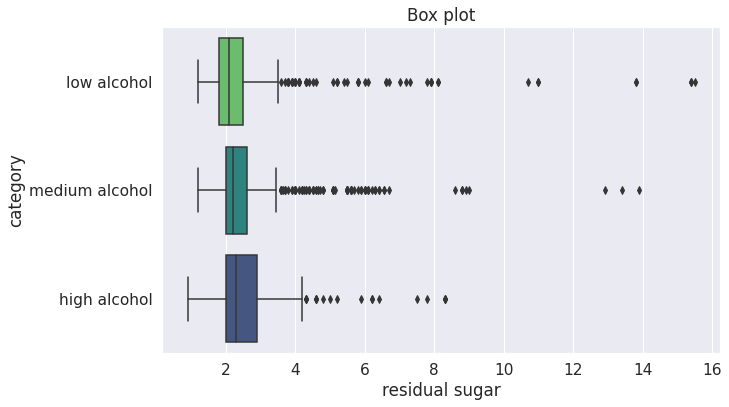

In [ ]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Box plot")
sns.boxplot(x=data["residual sugar"], y=data["category"], palette=palette)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** Догадки о наличии выбросов подтвердились. Получается, что лучше использовать медиану для оценки, так как она менее чувствительна к выбросам. Более того, значения средних ближе к правому краю ящиков, то есть к верхнему квартилю.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

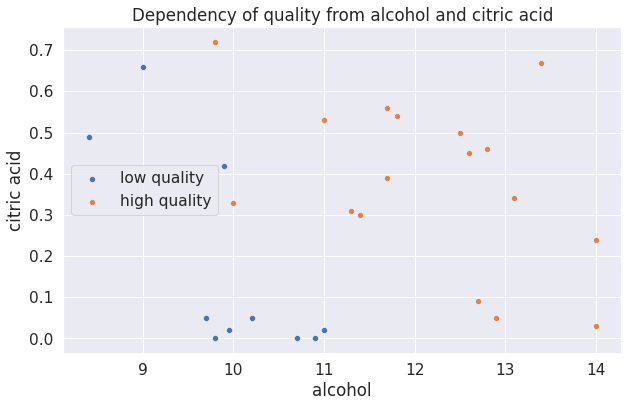

In [ ]:
plt.figure(figsize=(10, 6))

plt.title('Dependency of quality from alcohol and citric acid')
sns.scatterplot(data=data.where(data['quality'] == 3), x='alcohol', y='citric acid', palette=[palette[0]]+[palette[-1]], label='low quality')
sns.scatterplot(data=data.where(data['quality'] == 8), x='alcohol', y='citric acid', palette=[palette[0]]+[palette[-1]], label='high quality')
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

Оценкой максимального правдоподобия для $\mu$ является выборочное среднее, а для $\Sigma$ - выборочная дисперсия.

In [ ]:
low_quality_mean = data[data['quality'] == 3][['alcohol', 'citric acid']].mean(axis=0)
low_quality_cov = np.cov(np.array(data[data['quality'] == 3][["alcohol","citric acid"]]).transpose())

high_quality_mean = data[data['quality'] == 8][['alcohol', 'citric acid']].mean(axis=0)
high_quality_cov = np.cov(np.array(data[data['quality'] == 8][["alcohol","citric acid"]]).transpose())

alcohol_grid = linspace(7, 15, 1000)
citric_acid_grid = linspace(-0.4, 0.8, 1000)
grid = [[(x, y) for x in alcohol_grid] for y in citric_acid_grid]
low_quality_pdf = sps.multivariate_normal(low_quality_mean, low_quality_cov).pdf(grid)
high_quality_pdf = sps.multivariate_normal(high_quality_mean, high_quality_cov).pdf(grid)

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

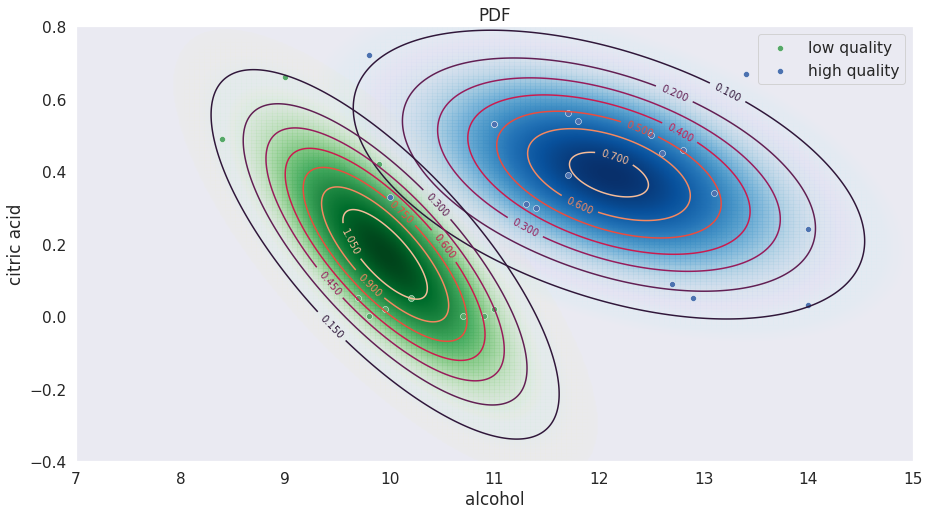

In [ ]:
plt.figure(figsize=(15,8))
plt.title("PDF")

plt.pcolormesh(alcohol_grid, citric_acid_grid, low_quality_pdf, cmap=get_density_cmap("Greens"))
plt.pcolormesh(alcohol_grid, citric_acid_grid, high_quality_pdf, cmap=get_density_cmap("Blues"))
sns.scatterplot(data=data.where(data['quality'] == 3), x="alcohol", y="citric acid", color='g', label="low quality")
sns.scatterplot(data=data.where(data['quality'] == 8), x="alcohol", y="citric acid", color='b', label="high quality")
plt.clabel(plt.contour(alcohol_grid, citric_acid_grid, high_quality_pdf))
plt.clabel(plt.contour(alcohol_grid, citric_acid_grid, low_quality_pdf))
plt.legend()
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** вина с наивысшим баллом содержат больше алкоголя и лимонной кислоты

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $ \theta \in [0, 1] $ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

Выбранная оценка - $\overline X$ \\
$E \overline X = \theta$

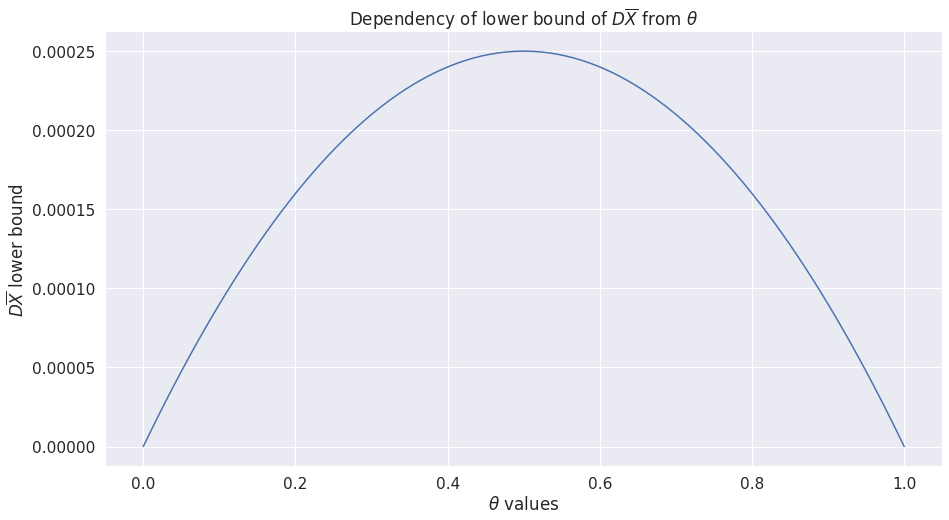

In [ ]:
n = 1000

plt.figure(figsize=(15, 8))
grid = linspace(0, 1, 100)

plt.title('Dependency of lower bound of '+r'$D\overline {X}$'+' from '+r'$\theta$')
plt.plot(grid, grid*(1-grid)/n)
plt.xlabel(r'$\theta$ values')
plt.ylabel(r'$D\overline {X}$ lower bound')
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод** дисперсия при $\theta$ отличных от 0.5 может оказаться меньше, чем при  $\theta=0.5$,  то есть потенциально $\theta=0.5$ худшая оценка параметра.

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

Посчитаем эффективную оценку $\theta$:

$p(x)=\theta^x(1-\theta)^{1-x},\ L_{\theta}=xln\theta + (1-x)ln(1-\theta) \\
\frac{\partial L_{\theta}}{\partial \theta} = \frac{x}{\theta}-\frac{1-x}{1-\theta},\  \frac{\partial^2 L_{\theta}}{\partial \theta^2} = \frac{-x}{\theta^2}-\frac{1-x}{(1-\theta)^2}=\frac{x(2\theta-1)-\theta^2}{\theta^2(1-\theta)^2} \\ 
i(\theta)=E\frac{-x(2\theta-1)+\theta^2}{\theta^2(1-\theta)^2}=\frac{1}{\theta(1-\theta)}\\ 
D\overline{X}=\frac{\theta(1-\theta)}{n} \\ $


Неравенство Рао-Крамера выполняется как равенство + является несмещенной оценкой

Будем считать выборочное среднее $\overline{X}$

In [ ]:
samples = np.array([sps.bernoulli(p=theta).rvs(size=n) for theta in grid])

mean = np.mean(samples, axis=1)

bootstrap_variances = []
for sample in samples:
  bootstrap_samples_means = np.random.choice(sample, size=(n, n)).mean(axis=1)
  var = np.sqrt(np.mean(bootstrap_samples_means**2)-np.mean(bootstrap_samples_means)**2)
  bootstrap_variances.append(var)

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

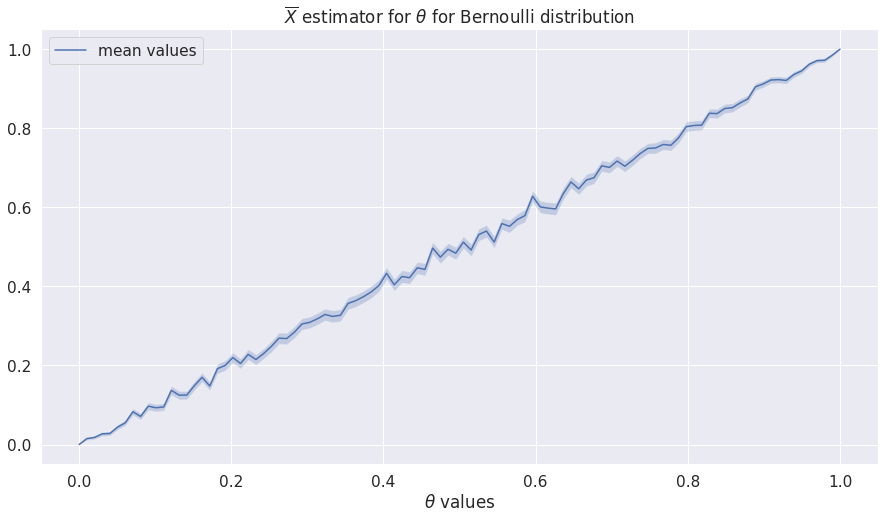

In [ ]:
plt.figure(figsize=(15,8))
plt.title(r"$\overline{X}$ estimator for $\theta$ for Bernoulli distribution")

plt.plot(grid, mean, label='mean values')
plt.fill_between(
    x=grid, 
    y1=mean+bootstrap_variances, 
    y2=mean-bootstrap_variances, 
    alpha=0.25
)

plt.xlabel(r'$\theta$ values')
plt.legend()
plt.show()

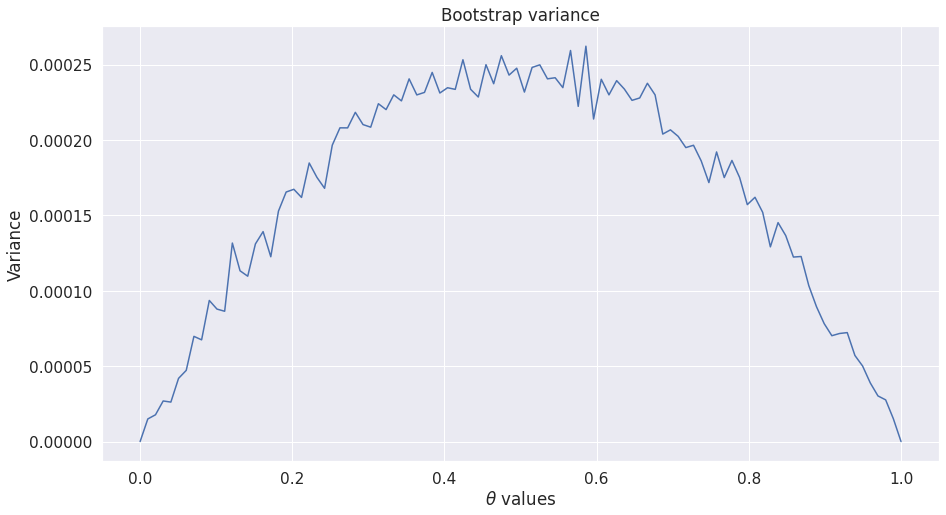

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Bootstrap variance")

plt.plot(grid, np.array(bootstrap_variances)**2)

plt.xlabel(r'$\theta$ values')
plt.ylabel('Variance')
plt.show()

**Вывод** Эффективная оценка принимает значения близкие к истинному. Бустрепная дисперсия имеет такую же зависимость от $\theta$, что и теоретическая дисперсия (и сами значения близки, то есть бутстрепная оценка довольно точная).